In [19]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
dataset_path = r'C:\Users\priya\OneDrive\Desktop\BrainTumor project\dataset'  # update path if needed

In [9]:
# Categories
categories = os.listdir(dataset_path)
print("Tumor Categories:", categories)

# Create dataframe
data = []

Tumor Categories: ['test', 'train']


In [10]:
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path)[:300]:  # limiting to 300 images per class for faster processing
        img_path = os.path.join(category_path, img_name)
        data.append([img_path, category])

In [20]:
df = pd.DataFrame(data, columns=["image_path", "label"])
print("\nData Sample:")
print(df.head())


Data Sample:
                                          image_path  label
0  C:\Users\priya\OneDrive\Desktop\BrainTumor pro...   test
1  C:\Users\priya\OneDrive\Desktop\BrainTumor pro...   test
2  C:\Users\priya\OneDrive\Desktop\BrainTumor pro...   test
3  C:\Users\priya\OneDrive\Desktop\BrainTumor pro...   test
4  C:\Users\priya\OneDrive\Desktop\BrainTumor pro...  train


C:\Users\priya\AppData\Local\Temp\ipykernel_26756\3068322203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


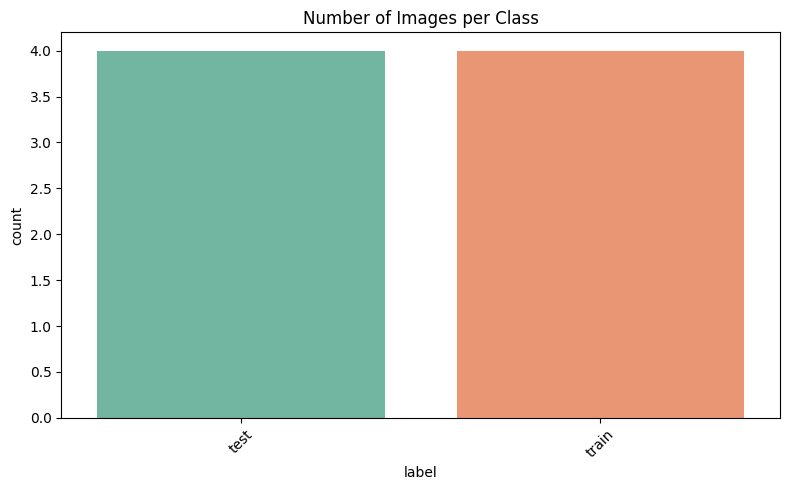

In [21]:
# Count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Show sample images per class
def show_images(df, category, n=5):
    sample_paths = df[df['label'] == category]['image_path'].values[:n]
    plt.figure(figsize=(15, 3))
    for i, img_path in enumerate(sample_paths):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.suptitle(f"Sample Images - {category}", fontsize=16)
    plt.tight_layout()
    plt.show()


In [24]:
def show_images(df, category, n=5):
    sample_paths = df[df['label'] == category]['image_path'].values[:n]
    plt.figure(figsize=(15, 3))
    shown = 0
    for i, img_path in enumerate(sample_paths):
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image at {img_path}")
            continue  # skip if image can't be read
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, shown + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
        shown += 1
        if shown >= n:
            break
    plt.suptitle(f"Sample Images - {category}", fontsize=16)
    plt.tight_layout()
    plt.show()


In [27]:
image_shapes = []

for img_path in df['image_path'][:200]:  # sample for speed
    img = cv2.imread(img_path)
    if img is not None:
        image_shapes.append(img.shape)  # (height, width, channels)
    else:
        print(f"Warning: Could not read image at {img_path}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Image Dimension Stats:
       height width channels
count       0     0        0
unique      0     0        0
top       NaN   NaN      NaN
freq      NaN   NaN      NaN


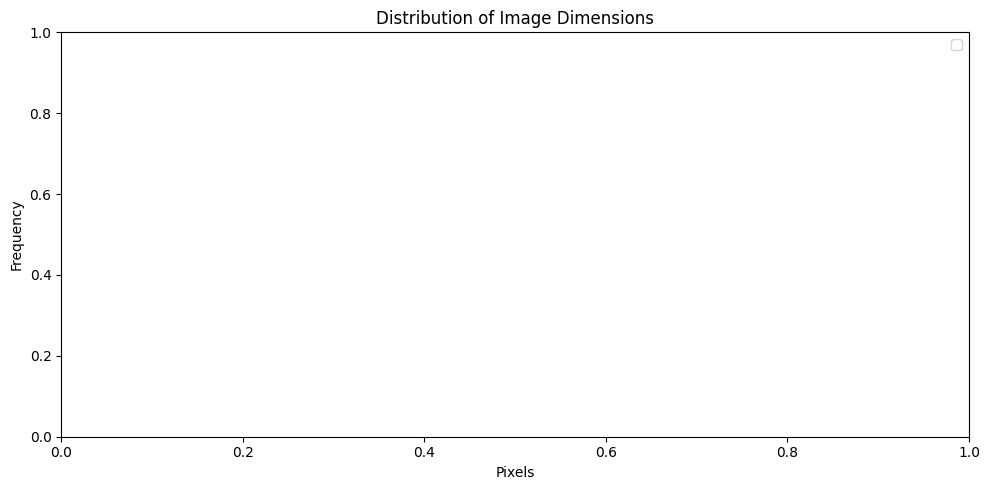

In [33]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create image_shapes list
image_shapes = []

# Sample first 200 images from the dataframe `df`
for img_path in df['image_path'][:200]:
    img = cv2.imread(img_path)
    if img is not None:
        image_shapes.append(img.shape)  # (height, width, channels)
    else:
        print(f"Warning: Could not read image at {img_path}")

# Create DataFrame
shapes_df = pd.DataFrame(image_shapes, columns=["height", "width", "channels"])

# Display basic stats
print("\nImage Dimension Stats:")
print(shapes_df.describe())

# Plot distributions
plt.figure(figsize=(10, 5))
sns.histplot(shapes_df["height"], kde=True, color='skyblue', label='height')
sns.histplot(shapes_df["width"], kde=True, color='salmon', label='width')
plt.legend()
plt.title("Distribution of Image Dimensions")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [31]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label_encoded'], random_state=42)

In [32]:
print("\nTrain/Test Split:")
print("Train size:", len(train_df))
print("Test size:", len(test_df))


Train/Test Split:
Train size: 6
Test size: 2
